<a href="https://colab.research.google.com/github/veenath09/Machine-Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import files
files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


{'Mall_Customers (1).csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female

In [44]:
path = '/content/Mall_Customers.csv'

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [46]:
df = pd.read_csv(path)

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: >

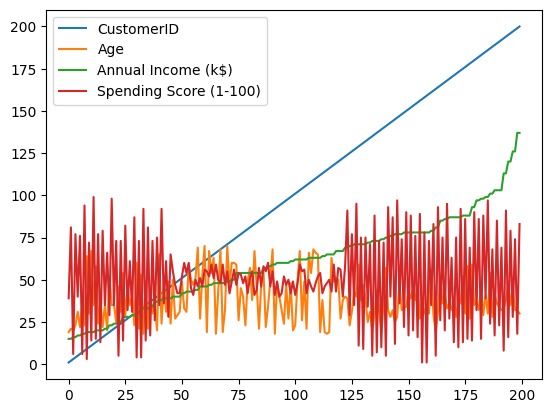

In [48]:
df.plot()

In [49]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


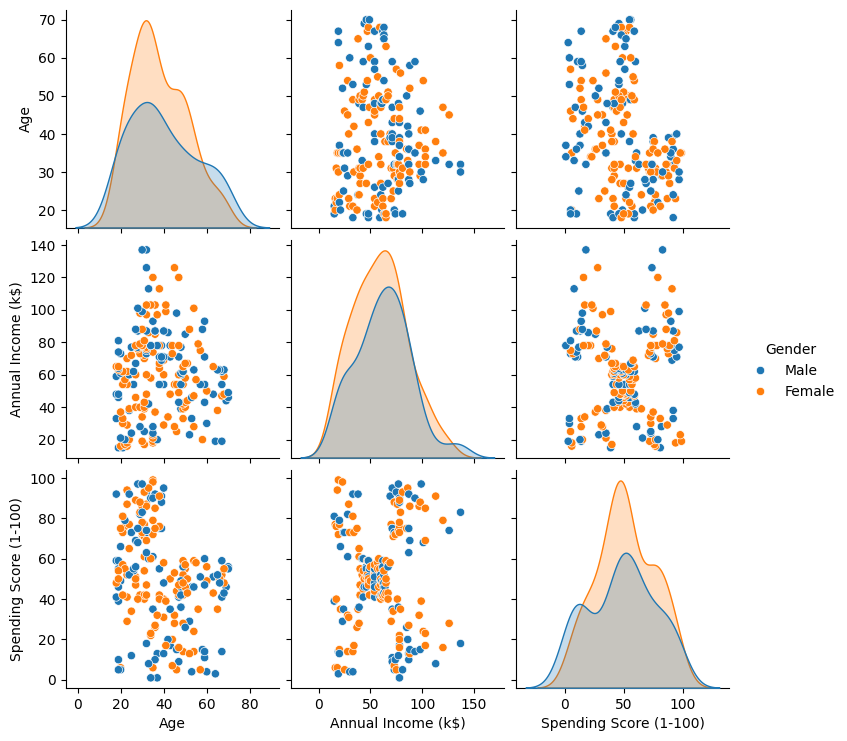

In [50]:
sns.pairplot(df, vars = ['Age','Annual Income (k$)','Spending Score (1-100)'], hue= "Gender")

In [51]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


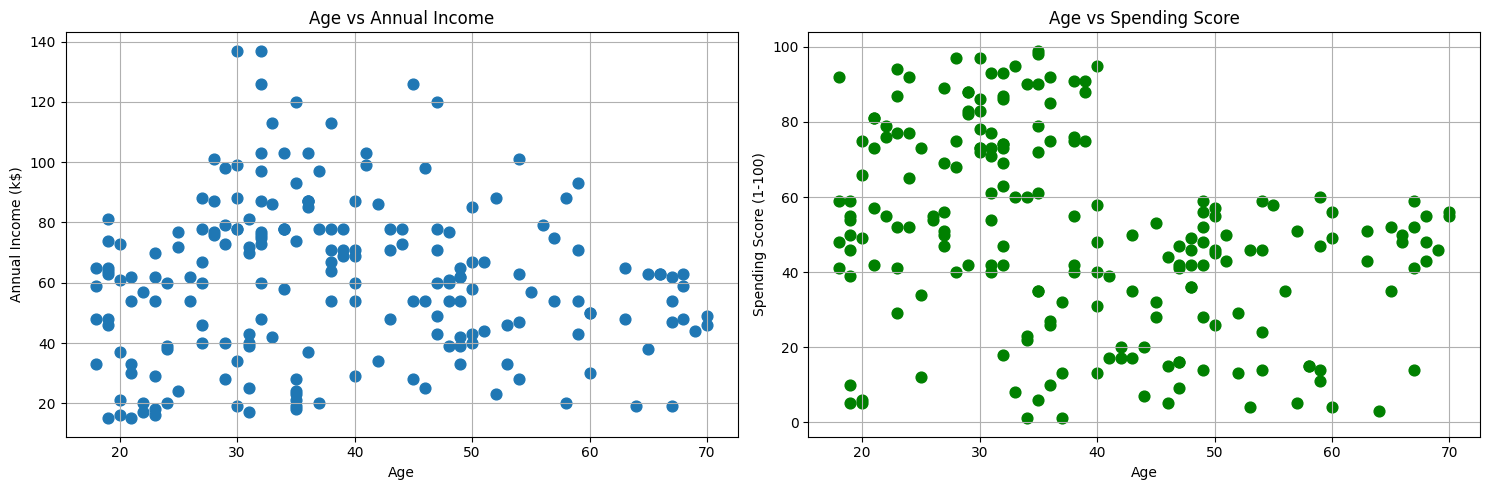

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))  # Create two side-by-side subplots

axes[0].scatter(df['Age'], df['Annual Income (k$)'], s=60)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Annual Income (k$)")
axes[0].set_title("Age vs Annual Income")
axes[0].grid(True)


axes[1].scatter(df['Age'], df['Spending Score (1-100)'], s=60, color='g')
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Spending Score (1-100)")
axes[1].set_title("Age vs Spending Score")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [55]:
from sklearn.cluster import KMeans

In [67]:
kMeans = KMeans(n_clusters=5)


In [70]:
X = df['Age']
Y = df['Annual Income (k$)']


In [74]:
df2 = df[['Age','Annual Income (k$)']]

[]

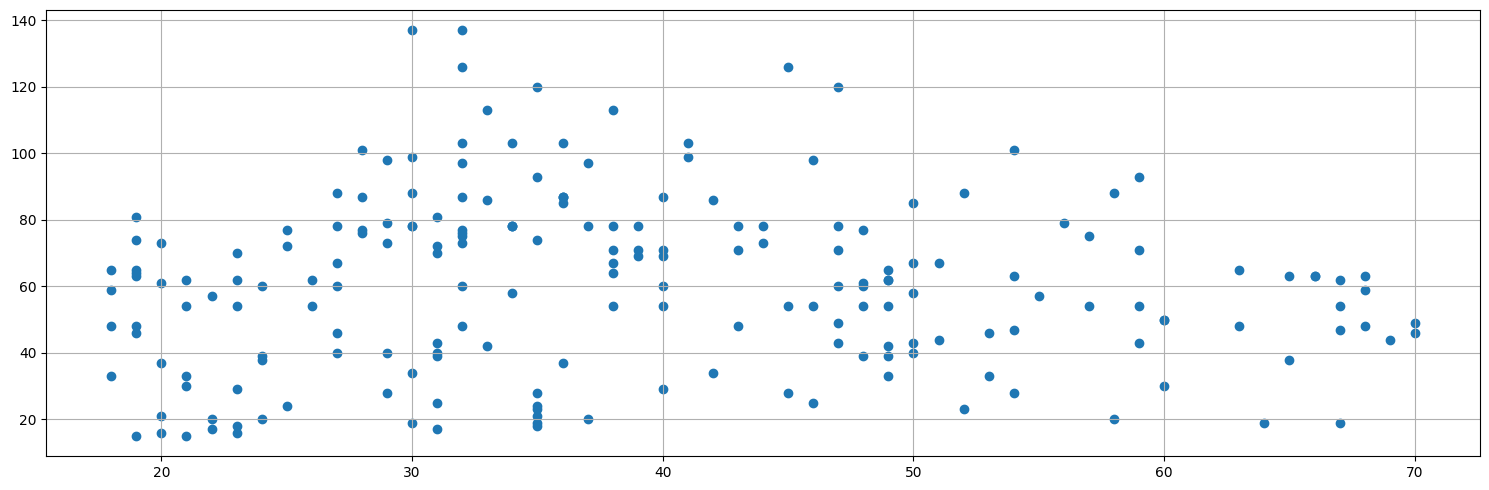

In [90]:
plt.figure(1,figsize=(15,5))
plt.scatter(df2['Age'],df2['Annual Income (k$)'])
plt.tight_layout()
plt.grid(True)
plt.plot()



In [84]:
from sklearn.cluster import KMeans
kMeans.fit(df2.values)

KMeans(n_clusters=3)

In [92]:
from sklearn.cluster import KMeans

# Create an instance of KMeans
kMeans = KMeans(n_clusters=5)

# Fit the model on the data
kMeans.fit(df2.values)  # ✅ Call .fit() on the instance

# Print cluster centers
print("Cluster Centers:", kMeans.cluster_centers_)


Cluster Centers: [[ 56.62        48.48      ]
 [ 25.06451613  59.48387097]
 [ 36.6        109.7       ]
 [ 29.53658537  27.24390244]
 [ 38.25862069  78.15517241]]


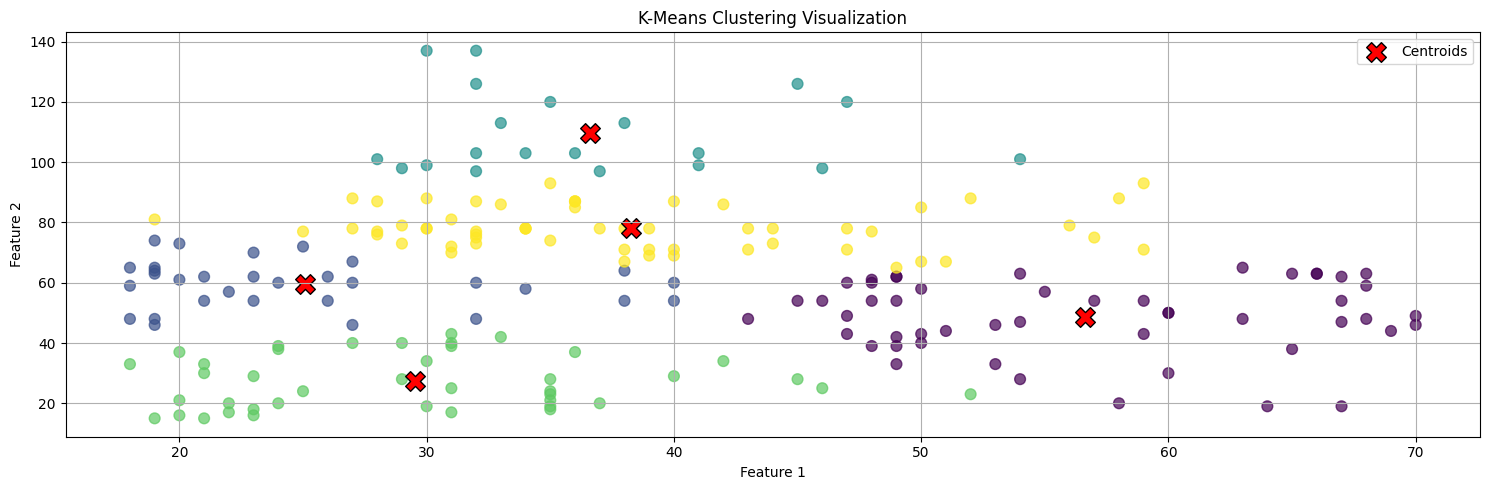

In [93]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,5))
# Scatter plot of the data points, colored by cluster
plt.scatter(df2.values[:, 0], df2.values[:, 1], c=kMeans.labels_, cmap='viridis', s=60, alpha=0.7)

# Plot the cluster centers
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1],
            marker='X', s=200, c='red', edgecolors='black', label='Centroids')

plt.xlabel("Feature 1")  # Change label based on actual feature name
plt.ylabel("Feature 2")  # Change label based on actual feature name
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
